# Simple Linear Regression. Minimal example

## Import the relevant libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # nice 3D graphs

##  Generate random input data to train on

Rerunning the code will always yield different inputs, but the MODEL will remain the same.

Same methodology for potentially infinite number of datasets.

As this is the basis of more sophisticated ML algorithms, its more important to see how it works than see the 'wow' insights up front.


In [6]:
observations = 1000 # this can be adjusted to 10k, 100k, etc.

We are about to create a two variable linear model:

$f(x,z)=a\times x+b\times z + c$

In [15]:
xs = np.random.uniform(low=-10,high=10,size=(observations,1)) # draws a random value from the interval
zs = np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs)) # takes a sequence of 1D arrays and stacks them into a single 2D array
inputs.shape # expecting 1000 x 2

(1000, 2)

We have created the inputs and are about to set the targets. The weights, biases and outputs are going to be left to the model to do.

## Create the targets we will aim at

In this example we will use fake targets to be sure that there is a linear relationship.

Our targets will be defined by the following arbitrary function:

$targets = f(x,z) = 2\times x - 3 \times z + 5 + noise$

Conceptually, the algorithm must learn that this is the function and the weights and biases are:

$w_1 = 2$ <br>
$w_2 = 3$ <br>
$b = 5$ <br>

Noise is introduced to make the data a bit random and more realistic. 

In [17]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise

targets.shape

(1000, 1)

## Plot the training data

The point is to see that there is a strong trend that our model should learn to reproduce.

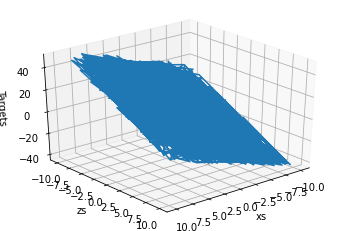

In [28]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations)

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111,projection='3d')

# Choose the axes
ax.plot(xs,zs,targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim.
ax.view_init(azim=50)

# Show the plot
plt.show()

targets = targets.reshape(observations,1)

Linear relationships in 2D are a straight line.

Linear relationships in 3D are a plane (like this graph)


## Create weights and biases

When looking at gradient descent, we started at an arbitrary number and proceeded. We must do the same now, but it is tricky. We dont want to start from any arbitrary number. We start from randomly selected weights.



### Initialise variables

In [30]:
init_range = 0.1

weights = np.random.uniform(-init_range,init_range,size=(2,1)) # a vector

biases = np.random.uniform(-init_range,init_range,size=1) # a scalar

weights, biases

(array([[ 0.06881414],
        [-0.00447107]]),
 array([0.00341613]))

## Set a learning rate

In [33]:
learning_rate = 0.02 # there is nothing special with this input, can vary

## Train the model

Game plan for each iteration:
- calculate outputs
- compare outputs to targets through the loss
- print the loss (using the L2-norm loss formula)
- adjust the weights and biases

In [34]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases # using np dot to multiply matrices
    
    deltas = outputs - targets
    
    loss = np.sum(deltas**2) / 2 / observations # python way to implement L2-norm/2
    # dividing by observations makes the learning independent of the number of observations
    print(loss) # if it is decreasing, ML algo is doing well
    
    deltas_scaled = deltas / observations
    # update following gradient descent methodology
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    

223.05387410114534
33.956629281036165
14.060052403561146
11.60046866724837
10.95234742537278
10.506314336410313
10.09605987056203
9.70387047112252
9.327354736164567
8.965721180493976
8.618364564132662
8.28471949647281
7.964244547814582
7.656419829677476
7.360745992750966
7.0767434005209635
6.803951349530674
6.541927321863299
6.290246267280313
6.048499913711468
5.816296104963663
5.593258164572835
5.3790242847668
5.173246939547755
4.975592320942447
4.785739797505408
4.603381394196926
4.428221292791971
4.25997535200966
4.098370646584874
3.9431450245342106
3.794046681898214
3.650833754269897
3.513273924447073
3.381144045571927
3.254229779146569
3.132325247337326
3.0152326990037577
2.9027621889106285
2.794731269602492
2.6909646954409805
2.591294138324788
2.4955579146311213
2.4036007229356895
2.3152733920857953
2.2304326392178035
2.1489408373264896
2.0706657920092266
1.9954805270228027
1.9232630783050537
1.8538962961271572
1.7872676550556412
1.7232690714158234
1.661796727960604
1.60275090546

We can see that the output eventually tends towards small changes. This is how we know the model has worked well.

## Print weights and biases and see if we have worked correctly

In [37]:
weights, biases

(array([[ 2.00102139],
        [-3.00369412]]),
 array([4.91545809]))

We were looking for:
- $w_1 = 2$ and we got 1.99, which is good
- $w_2 = -3$ and we got -2.99, which is good
- $b = 5$ and we got 4.33 which is not the best

The bias would probably have improved a lot if we spent longer training the model.

Lets run the training for another 100 rounds...

In [36]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases # using np dot to multiply matrices
    
    deltas = outputs - targets
    
    loss = np.sum(deltas**2) / 2 / observations # python way to implement L2-norm/2
    # dividing by observations makes the learning independent of the number of observations
    print(loss) # if it is decreasing, ML algo is doing well
    
    deltas_scaled = deltas / observations
    # update following gradient descent methodology
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

0.39129171932309337
0.38239701931652625
0.37385342315177217
0.365647071574709
0.3577646524027686
0.3501933789301795
0.3429209691856161
0.33593562600863575
0.32922601791254674
0.3227812607026999
0.3165908998203585
0.3106448933835178
0.30493359589716246
0.29944774260653206
0.29417843446801933
0.28911712371331566
0.2842555999833878
0.2795859770097965
0.275100679821744
0.2707924324581082
0.2666542461645185
0.262679408056336
0.25886147022914563
0.2551942392990895
0.25167176635608307
0.24828833731360814
0.24503846363943563
0.2419168734522347
0.23891850296963127
0.23603848829383958
0.2332721575215411
0.23061502316521634
0.22806277487363014
0.22561127243966447
0.22325653908415483
0.22099475500483856
0.21882225117994486
0.21673550341638112
0.21473112663285512
0.21280586936866253
0.2109566085092322
0.20918034421986983
0.20747419507948478
0.20583539340640641
0.20426128076870487
0.20274930367173352
0.20129700941590245
0.19990204211795518
0.19856213888930194
0.1972751261652066
0.19603891617887184
0

In [38]:
weights, biases

(array([[ 2.00102139],
        [-3.00369412]]),
 array([4.91545809]))

The bias has improved a lot since we ran another run of the training.

## Plot last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy. The closer this plot is to a 45 degree line, the closer target and output values are.

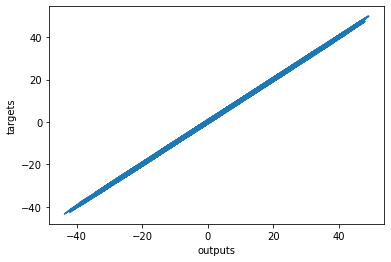

In [39]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

Our model worked well. 